In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [4]:
# 讀取資料
moviesPref = pd.read_csv("moviesPreference.csv")
moviesPref.head()

,movie,extraversion,conscientiousness,emotionality,openness
0,27 Dresses,0.491867,1.187850,0.425176,-1.959345
1,50 First Dates,-0.362843,1.187850,-0.578141,-0.662553
2,A Walk to Remember,1.061674,1.187850,-0.427644,-1.810727
3,Avatar,-0.718973,0.191167,-0.578141,-0.279828
4,Back To the Future,-0.718973,-0.606179,0.926835,-0.279828


In [19]:
# 相關性分析
moviesPref.corr()

,extraversion,conscientiousness,emotionality,openness
extraversion,1.000000,0.498482,-0.125655,-0.567159
conscientiousness,0.498482,1.000000,-0.318760,-0.627018
emotionality,-0.125655,-0.318760,1.000000,0.189734
openness,-0.567159,-0.627018,0.189734,1.000000


In [20]:
# 透過相關性的結果來合併特徵
feature = pd.DataFrame()
feature['extCons'] = moviesPref['extraversion'] + moviesPref['conscientiousness'] 
feature['emoOpen'] = moviesPref['emotionality'] + moviesPref['openness']

X = feature[['extCons','emoOpen']].values
X.shape

(25, 2)

In [21]:
n_clusters = 2 
cluster = KMeans(n_clusters, random_state=0, verbose=0).fit(X)
Z = cluster.predict(np.c_[X])
center = cluster.cluster_centers_

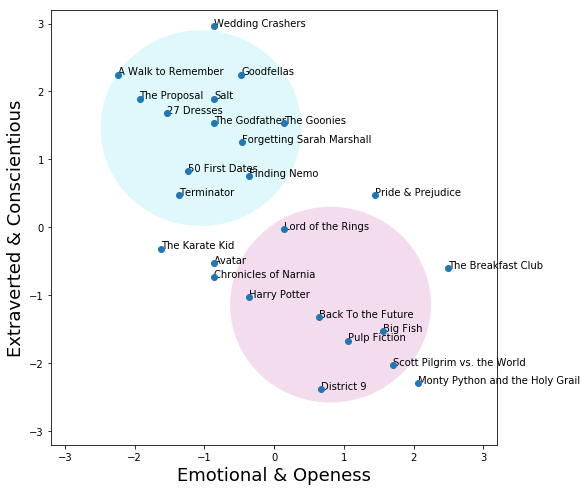

In [22]:
movies = moviesPref['movie']

# 指定顏色 顏色=([r,g,b]) 0~255
color = np.array([244, 220, 239])
color = np.vstack((color, np.array([222, 248, 252])))
color = np.vstack((color, np.array([247, 237, 200])))/255

# 產生散佈圖
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

z = X[:,1]
y = X[:,0]
plt.scatter(x=z, y=y, zorder=30) #使散佈圖顯示在最上層

# 加入原本的電影名稱
for j, txt in enumerate(movies):
    plt.annotate(txt, (z[j], y[j]))

# 加上圓
for i in range(n_clusters):
    r = np.sum(Z==0)/25 #正規化圓的大小
    ellipse = Ellipse(xy=(center[i,1], center[i,0]), width=6*r, height=6*r, facecolor=color[i], lw=2)
    ax.add_patch(ellipse)
plt.ylim(top=3.2, bottom=-3.2)
plt.xlim(right=3.2, left=-3.2)
plt.ylabel('Extraverted & Conscientious', fontsize=18)
plt.xlabel('Emotional & Openess', fontsize=18)
plt.show()